In [1]:
import sys
sys.path.append('../src')

from models.ViTH14Model.train_cv import train_cv as train_ViTH14Model
from models.ViTH14Model.predict import predict as predict_ViTH14Model

from utils.show_graph import plot_history

In [2]:
package_model_path, loss_history, auc_history = train_ViTH14Model(
    num_epochs=5,
    learning_rate=1e-05,
    batch_size=4,
    n_splits=5,
    use_flozen=True,
    seed=1187
)

[DEBUG] 2023-09-28 12:02:06 - Batch size: 4
[DEBUG] 2023-09-28 12:02:06 - Learning rate: 1e-05
[DEBUG] 2023-09-28 12:02:06 - Number of epochs: 5
[DEBUG] 2023-09-28 12:02:06 - Seed: 1187
[DEBUG] 2023-09-28 12:02:06 - Minimum learning rate: 1e-06
[DEBUG] 2023-09-28 12:02:06 - Number of splits: 5
[DEBUG] 2023-09-28 12:02:06 - Pretrained: True
[DEBUG] 2023-09-28 12:02:06 - Use flozen: True
[DEBUG] 2023-09-28 12:02:06 - Start fold: 0
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
[DEBUG] 2023-09-28 12:02:06 - Fold: 1/5
[DEBUG] 2023-09-28 12:02:06 - ----------------------------------------
[DEBUG] 2023-09-28 12:02:16 - Using device: cuda(NVIDIA L4)
[DEBUG] 2023-09-28 12:02:16 - Starting training on cuda at 2023-09-28 21:02:16
[DEBUG] 2023-09-28 12:02:16 - Model: VisionTransformer
[DEBUG] 2023-09-28 12:02:16 - Model parameters:
[DEBUG] 2023-09-28 12:02:16 - class_to

In [3]:
for path in package_model_path:
    print(path)

/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928210216_epoch_4_auc_0.9073.pth
/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928214122_epoch_5_auc_0.9130.pth
/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928222026_epoch_3_auc_0.9048.pth
/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928225921_epoch_5_auc_0.9023.pth
/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928233832_epoch_5_auc_0.8810.pth


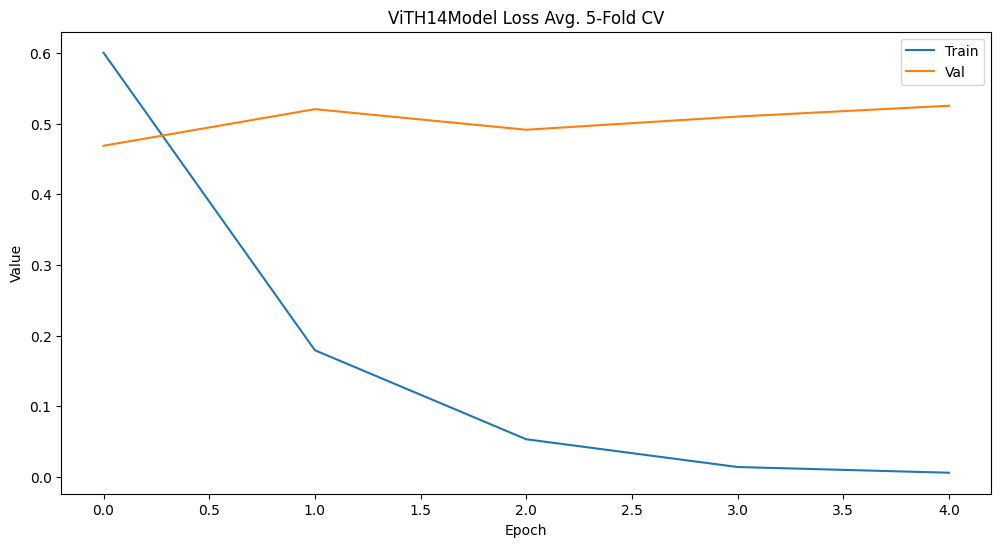

In [4]:
plot_history(loss_history, "ViTH14Model Loss Avg. 5-Fold CV")

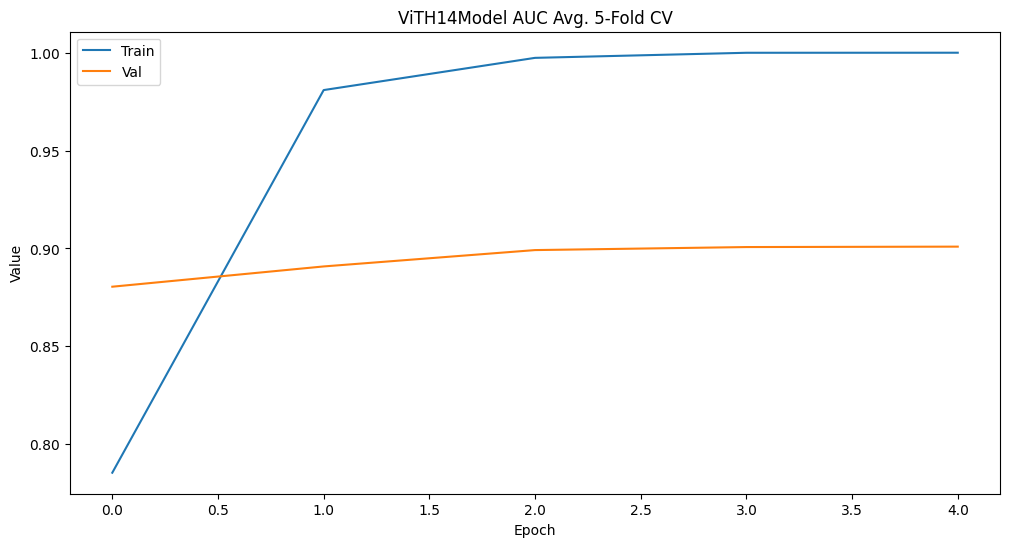

In [5]:
plot_history(auc_history, "ViTH14Model AUC Avg. 5-Fold CV")

In [10]:
import pandas as pd

sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

bast_auc_vitl16_model_paths = package_model_path

for index, best_auc_model_path in enumerate(bast_auc_vitl16_model_paths):
  _, y_pred = predict_ViTH14Model(
      model_path=best_auc_model_path,
      batch_size=4,
      seed=1187
  )
  sample_submission[f'model_vith14_{index}_2023'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)

sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_ensemble_202309290022_vith14_45355_epoch.csv', index=False, header=False)

[DEBUG] 2023-09-28 15:32:14 - Starting prediction on cuda
[DEBUG] 2023-09-28 15:32:14 - Using TTA: False
[DEBUG] 2023-09-28 15:32:14 - TTA Transforms: None
Prediction: 100%|██████████| 545/545 [05:01<00:00,  1.81it/s]
[DEBUG] 2023-09-28 15:37:15 - Finished prediction
[DEBUG] 2023-09-28 15:37:39 - Starting prediction on cuda
[DEBUG] 2023-09-28 15:37:39 - Using TTA: False
[DEBUG] 2023-09-28 15:37:39 - TTA Transforms: None
Prediction: 100%|██████████| 545/545 [05:01<00:00,  1.81it/s]
[DEBUG] 2023-09-28 15:42:40 - Finished prediction
[DEBUG] 2023-09-28 15:43:04 - Starting prediction on cuda
[DEBUG] 2023-09-28 15:43:04 - Using TTA: False
[DEBUG] 2023-09-28 15:43:04 - TTA Transforms: None
Prediction: 100%|██████████| 545/545 [05:01<00:00,  1.81it/s]
[DEBUG] 2023-09-28 15:48:05 - Finished prediction
[DEBUG] 2023-09-28 15:48:38 - Starting prediction on cuda
[DEBUG] 2023-09-28 15:48:38 - Using TTA: False
[DEBUG] 2023-09-28 15:48:38 - TTA Transforms: None
Prediction: 100%|██████████| 545/545 [05

In [11]:
import pandas as pd

sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

bast_auc_vitl16_model_paths = [
    "/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928210216_epoch_3_auc_0.9057.pth",
    "/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928214122_epoch_3_auc_0.9100.pth",
    "/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928222026_epoch_3_auc_0.9048.pth",
    "/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928225921_epoch_3_auc_0.9005.pth",
    "/workspace/t/src/data/models/ViTH14Model_cv/visiontransformer_20230928233832_epoch_3_auc_0.8749.pth"
]

for index, best_auc_model_path in enumerate(bast_auc_vitl16_model_paths):
  _, y_pred = predict_ViTH14Model(
      model_path=best_auc_model_path,
      batch_size=4,
      seed=1187
  )
  sample_submission[f'model_vith14_{index}_2023'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)

sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_ensemble_202309290022_vith14_45355_epoch.csv', index=False, header=False)

[DEBUG] 2023-09-28 16:09:19 - Starting prediction on cuda
[DEBUG] 2023-09-28 16:09:19 - Using TTA: False
[DEBUG] 2023-09-28 16:09:19 - TTA Transforms: None
Prediction: 100%|██████████| 545/545 [04:59<00:00,  1.82it/s]
[DEBUG] 2023-09-28 16:14:19 - Finished prediction
[DEBUG] 2023-09-28 16:14:29 - Starting prediction on cuda
[DEBUG] 2023-09-28 16:14:29 - Using TTA: False
[DEBUG] 2023-09-28 16:14:29 - TTA Transforms: None
Prediction: 100%|██████████| 545/545 [05:00<00:00,  1.81it/s]
[DEBUG] 2023-09-28 16:19:29 - Finished prediction
[DEBUG] 2023-09-28 16:19:39 - Starting prediction on cuda
[DEBUG] 2023-09-28 16:19:39 - Using TTA: False
[DEBUG] 2023-09-28 16:19:39 - TTA Transforms: None
Prediction: 100%|██████████| 545/545 [05:00<00:00,  1.81it/s]
[DEBUG] 2023-09-28 16:24:40 - Finished prediction
[DEBUG] 2023-09-28 16:25:03 - Starting prediction on cuda
[DEBUG] 2023-09-28 16:25:03 - Using TTA: False
[DEBUG] 2023-09-28 16:25:03 - TTA Transforms: None
Prediction: 100%|██████████| 545/545 [05